1. Загрузка и первичный осмотр данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# Настройка стиля для графиков
sns.set_style("whitegrid")

In [ ]:
df = pd.read_excel("Данные_для_курсовои_Классическое_МО.xlsx")

In [ ]:
print("Размерность данных:", df.shape)

Размерность данных: (1001, 214)


In [ ]:
print("Первые 5 строк данных:")
df.head()


Первые 5 строк данных:


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Информация о данных:")
df.info()


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [ ]:
print("Описательная статистика:")
df.describe()


Описательная статистика:


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


2. Предварительный анализ и очистка данных

Удаление Unnamed: 0

In [ ]:
if 'Unnamed: 0' in df.columns:
     df.drop(columns=['Unnamed: 0'], inplace=True)
     print("Столбец 'Unnamed: 0' удален.")

Проверка на пропущенные значения:

In [ ]:
print("Пропущенные значения до обработки:")
df.isnull().sum()[df.isnull().sum() > 0]


Пропущенные значения до обработки:


,0
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
MinAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MWLOW,3
BCUT2D_CHGHI,3
BCUT2D_CHGLO,3
BCUT2D_LOGPHI,3
BCUT2D_LOGPLOW,3


Среди 1000 химических соединений, 3 пропущенных значения на столбец — это очень мало.

Заполнение медианой:

In [ ]:
columns_with_missing = [
    'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
    'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
    'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW'
]

print("Пропущенные значения до обработки:")
print(df[columns_with_missing].isnull().sum())

for col in columns_with_missing:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Пропущенные значения в столбце '{col}' заполнены медианой: {median_val:.4f}")

print("\nПропущенные значения после обработки:")
print(df[columns_with_missing].isnull().sum())

Пропущенные значения до обработки:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64
Пропущенные значения в столбце 'MaxPartialCharge' заполнены медианой: 0.2507
Пропущенные значения в столбце 'MinPartialCharge' заполнены медианой: -0.3936
Пропущенные значения в столбце 'MaxAbsPartialCharge' заполнены медианой: 0.4261
Пропущенные значения в столбце 'MinAbsPartialCharge' заполнены медианой: 0.2507
Пропущенные значения в столбце 'BCUT2D_MWHI' заполнены медианой: 16.5641
Пропущенные значения в столбце 'BCUT2D_MWLOW' заполнены медианой: 9.7154
Пропущенные значения в столбце 'BCUT2D_CHGHI' заполнены медианой: 2.5058
Пропущенные значения в столбце 'BCUT2D_CHGLO' заполнены медианой: -2.3585
Пропущенные значения в столбце 'BCUT2D_LOGPH

<ipython-input-60-1151b33b474d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


3. Анализ целевых переменных (IC50, CC50, SI)


--- Анализ и преобразование целевых переменных ---

--- Анализ столбца: IC50, mM ---


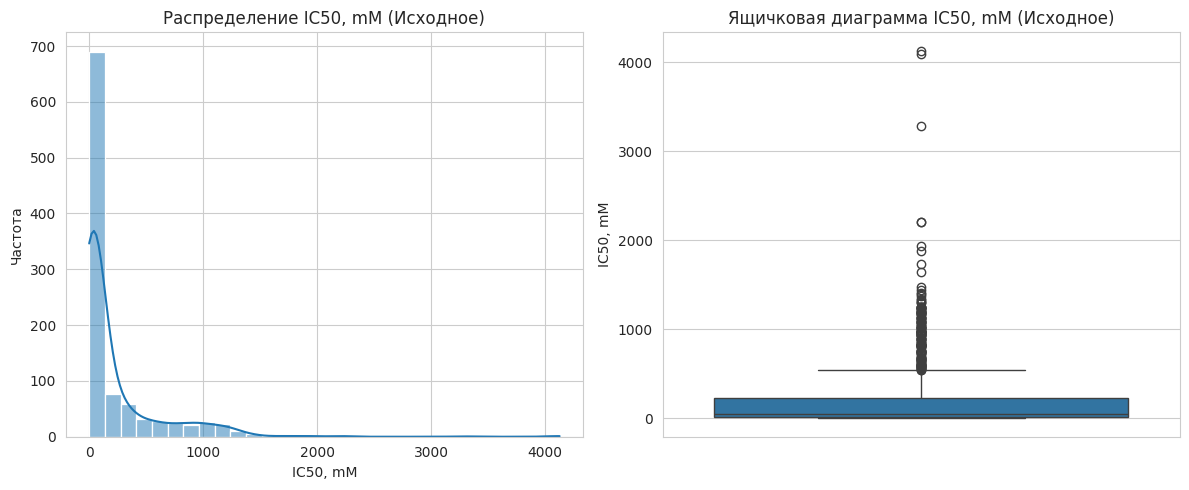

Скошенность столбца 'IC50, mM': 3.67
Столбец 'IC50, mM' сильно скошен. Применено логарифмическое преобразование (log10) в новый столбец 'log_IC50'.


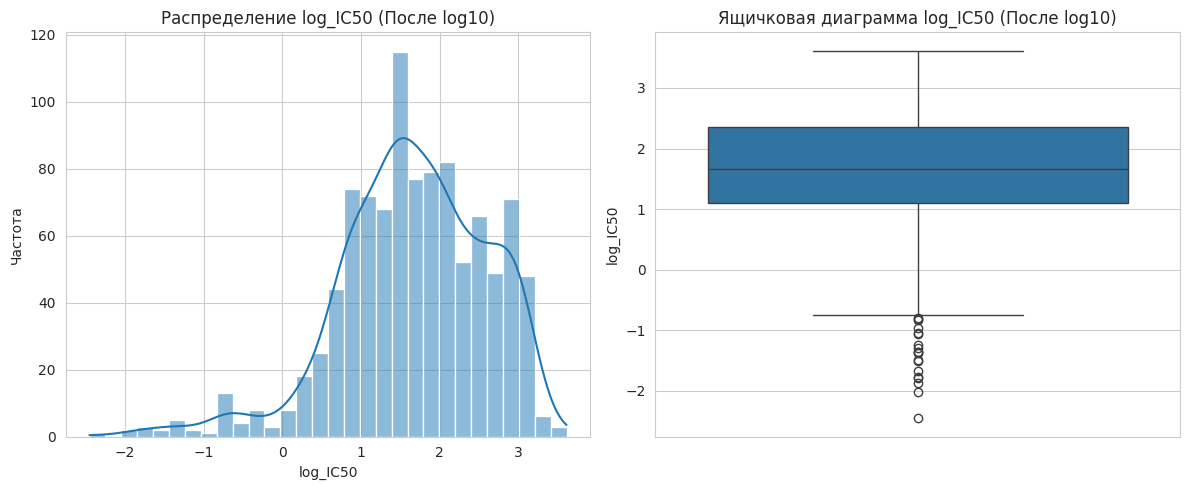

Новая скошенность 'log_IC50': -0.74

--- Анализ столбца: CC50, mM ---


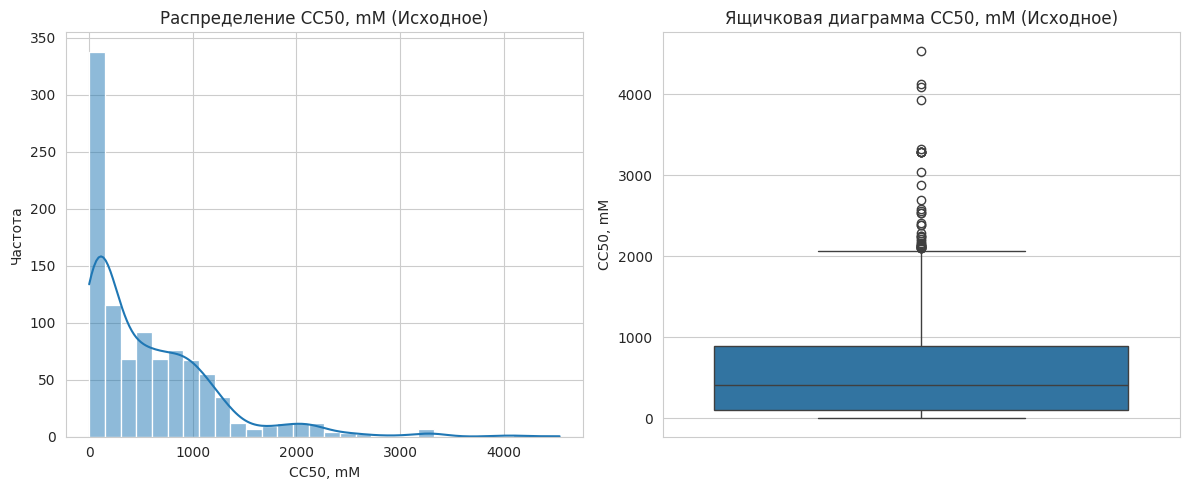

Скошенность столбца 'CC50, mM': 1.97
Столбец 'CC50, mM' сильно скошен. Применено логарифмическое преобразование (log10) в новый столбец 'log_CC50'.


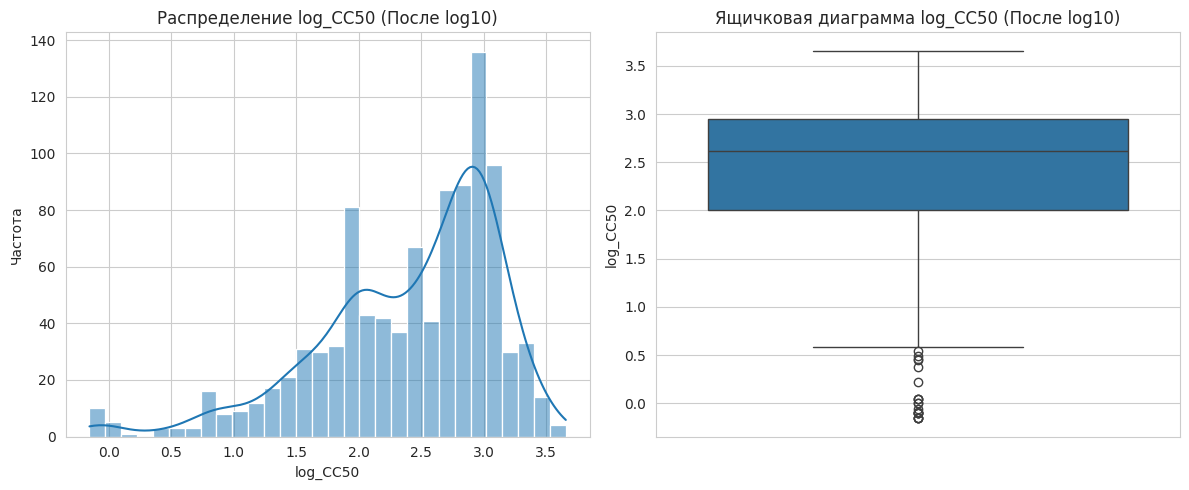

Новая скошенность 'log_CC50': -1.07

--- Анализ столбца: SI ---


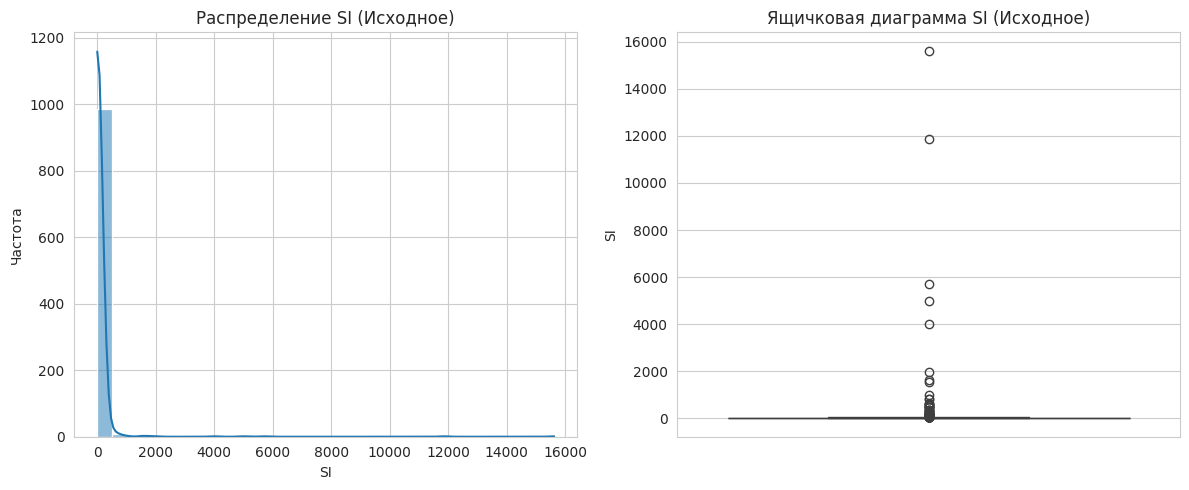

Скошенность столбца 'SI': 18.01
Столбец 'SI' сильно скошен. Применено логарифмическое преобразование (log10) в новый столбец 'log_SI'.


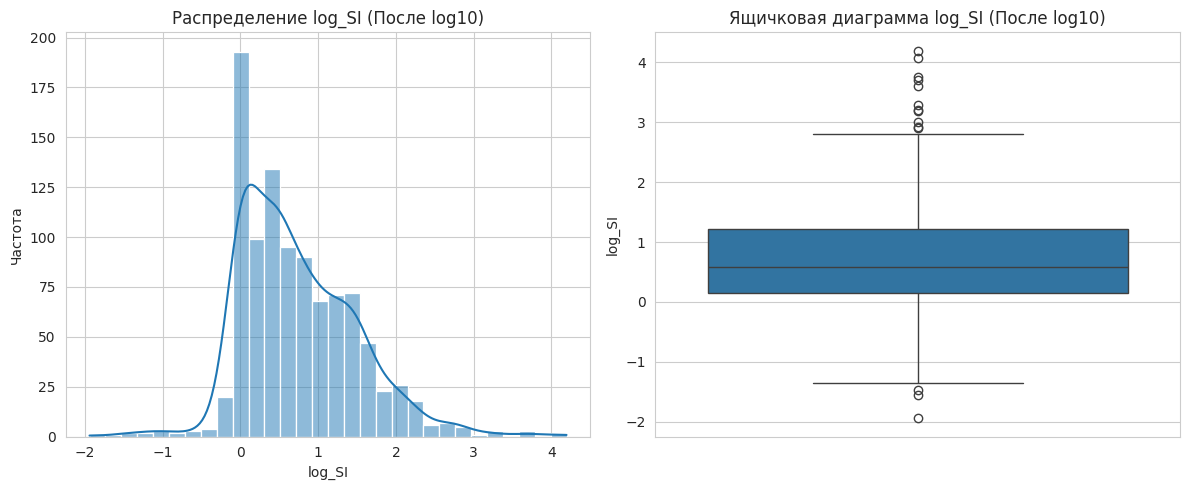

Новая скошенность 'log_SI': 0.80

--- Проверка взаимосвязи SI, IC50, CC50 ---
Средняя абсолютная разница между SI и CC50/IC50: 0.000000
Вывод: SI, по-видимому, точно рассчитывается как CC50 / IC50. Это означает, что SI не является независимой целевой переменной.
Для задач регрессии, можно сосредоточиться на прогнозировании IC50 и CC50, а затем вычислять SI.


In [ ]:
print("Анализ и преобразование целевых переменных")
target_cols = ['IC50, mM', 'CC50, mM', 'SI']
transformed_target_cols = []

for col in target_cols:
    print(f"Анализ столбца: {col}")
    # Визуализация распределения до преобразования
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Распределение {col} (Исходное)')
    plt.xlabel(col)
    plt.ylabel('Частота')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Ящичковая диаграмма {col} (Исходное)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    skewness = df[col].skew()
    print(f"Скошенность столбца '{col}': {skewness:.2f}")

    # Проверка на логарифмическое преобразование
    # Если столбец сильно скошен и содержит только положительные значения
    if (skewness > 1 or skewness < -1) and (df[col] > 0).all():
        log_col_name = f'log_{col.replace(", mM", "").replace(" ", "_")}' # Создаем имя для нового столбца
        df[log_col_name] = np.log10(df[col])
        transformed_target_cols.append(log_col_name) # Добавляем в список
        print(f"Столбец '{col}' сильно скошен. Применено логарифмическое преобразование (log10) в новый столбец '{log_col_name}'.")

        # Визуализация распределения после преобразования
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[log_col_name], kde=True, bins=30)
        plt.title(f'Распределение {log_col_name} (После log10)')
        plt.xlabel(log_col_name)
        plt.ylabel('Частота')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[log_col_name])
        plt.title(f'Ящичковая диаграмма {log_col_name} (После log10)')
        plt.ylabel(log_col_name)
        plt.tight_layout()
        plt.show()

        print(f"Новая скошенность '{log_col_name}': {df[log_col_name].skew():.2f}")
    elif not (df[col] > 0).all():
        print(f"Невозможно применить логарифмическое преобразование к '{col}' из-за нулевых или отрицательных значений.")
    else:
        print(f"Столбец '{col}' не требует логарифмического преобразования (скошенность {skewness:.2f}).")


# Проверка соотношения SI, IC50, CC50
print("Проверка взаимосвязи SI, IC50, CC50")
# Для проверки корректности SI, фильтруем строки, где IC50 > 0, чтобы избежать деления на ноль
valid_si_check_df = df[(df['IC50, mM'] > 0) & (df['CC50, mM'] > 0)].copy()

if not valid_si_check_df.empty:
    valid_si_check_df['Calculated_SI'] = valid_si_check_df['CC50, mM'] / valid_si_check_df['IC50, mM']
    si_diff = (valid_si_check_df['SI'] - valid_si_check_df['Calculated_SI']).abs()
    print(f"Средняя абсолютная разница между SI и CC50/IC50: {si_diff.mean():.6f}") # Увеличиваем точность вывода

    if si_diff.max() < 1e-5: # Малое пороговое значение для проверки на равенство с плавающей точкой
        print("Вывод: SI, по-видимому, точно рассчитывается как CC50 / IC50. Это означает, что SI не является независимой целевой переменной.")
        print("Для задач регрессии, можно сосредоточиться на прогнозировании IC50 и CC50, а затем вычислять SI.")
    else:
        print("Вывод: SI не точно соответствует CC50 / IC50. Возможно, используются другие формулы или округления, или есть небольшие расхождения.")
else:
    print("Недостаточно данных для проверки соотношения SI, IC50, CC50 (возможно, IC50 или CC50 содержат нули/отрицательные значения, или датафрейм пуст после фильтрации).")


4. Анализ признаков химических соединений (Корреляционный анализ)


--- Анализ признаков химических соединений (Корреляционный анализ) ---


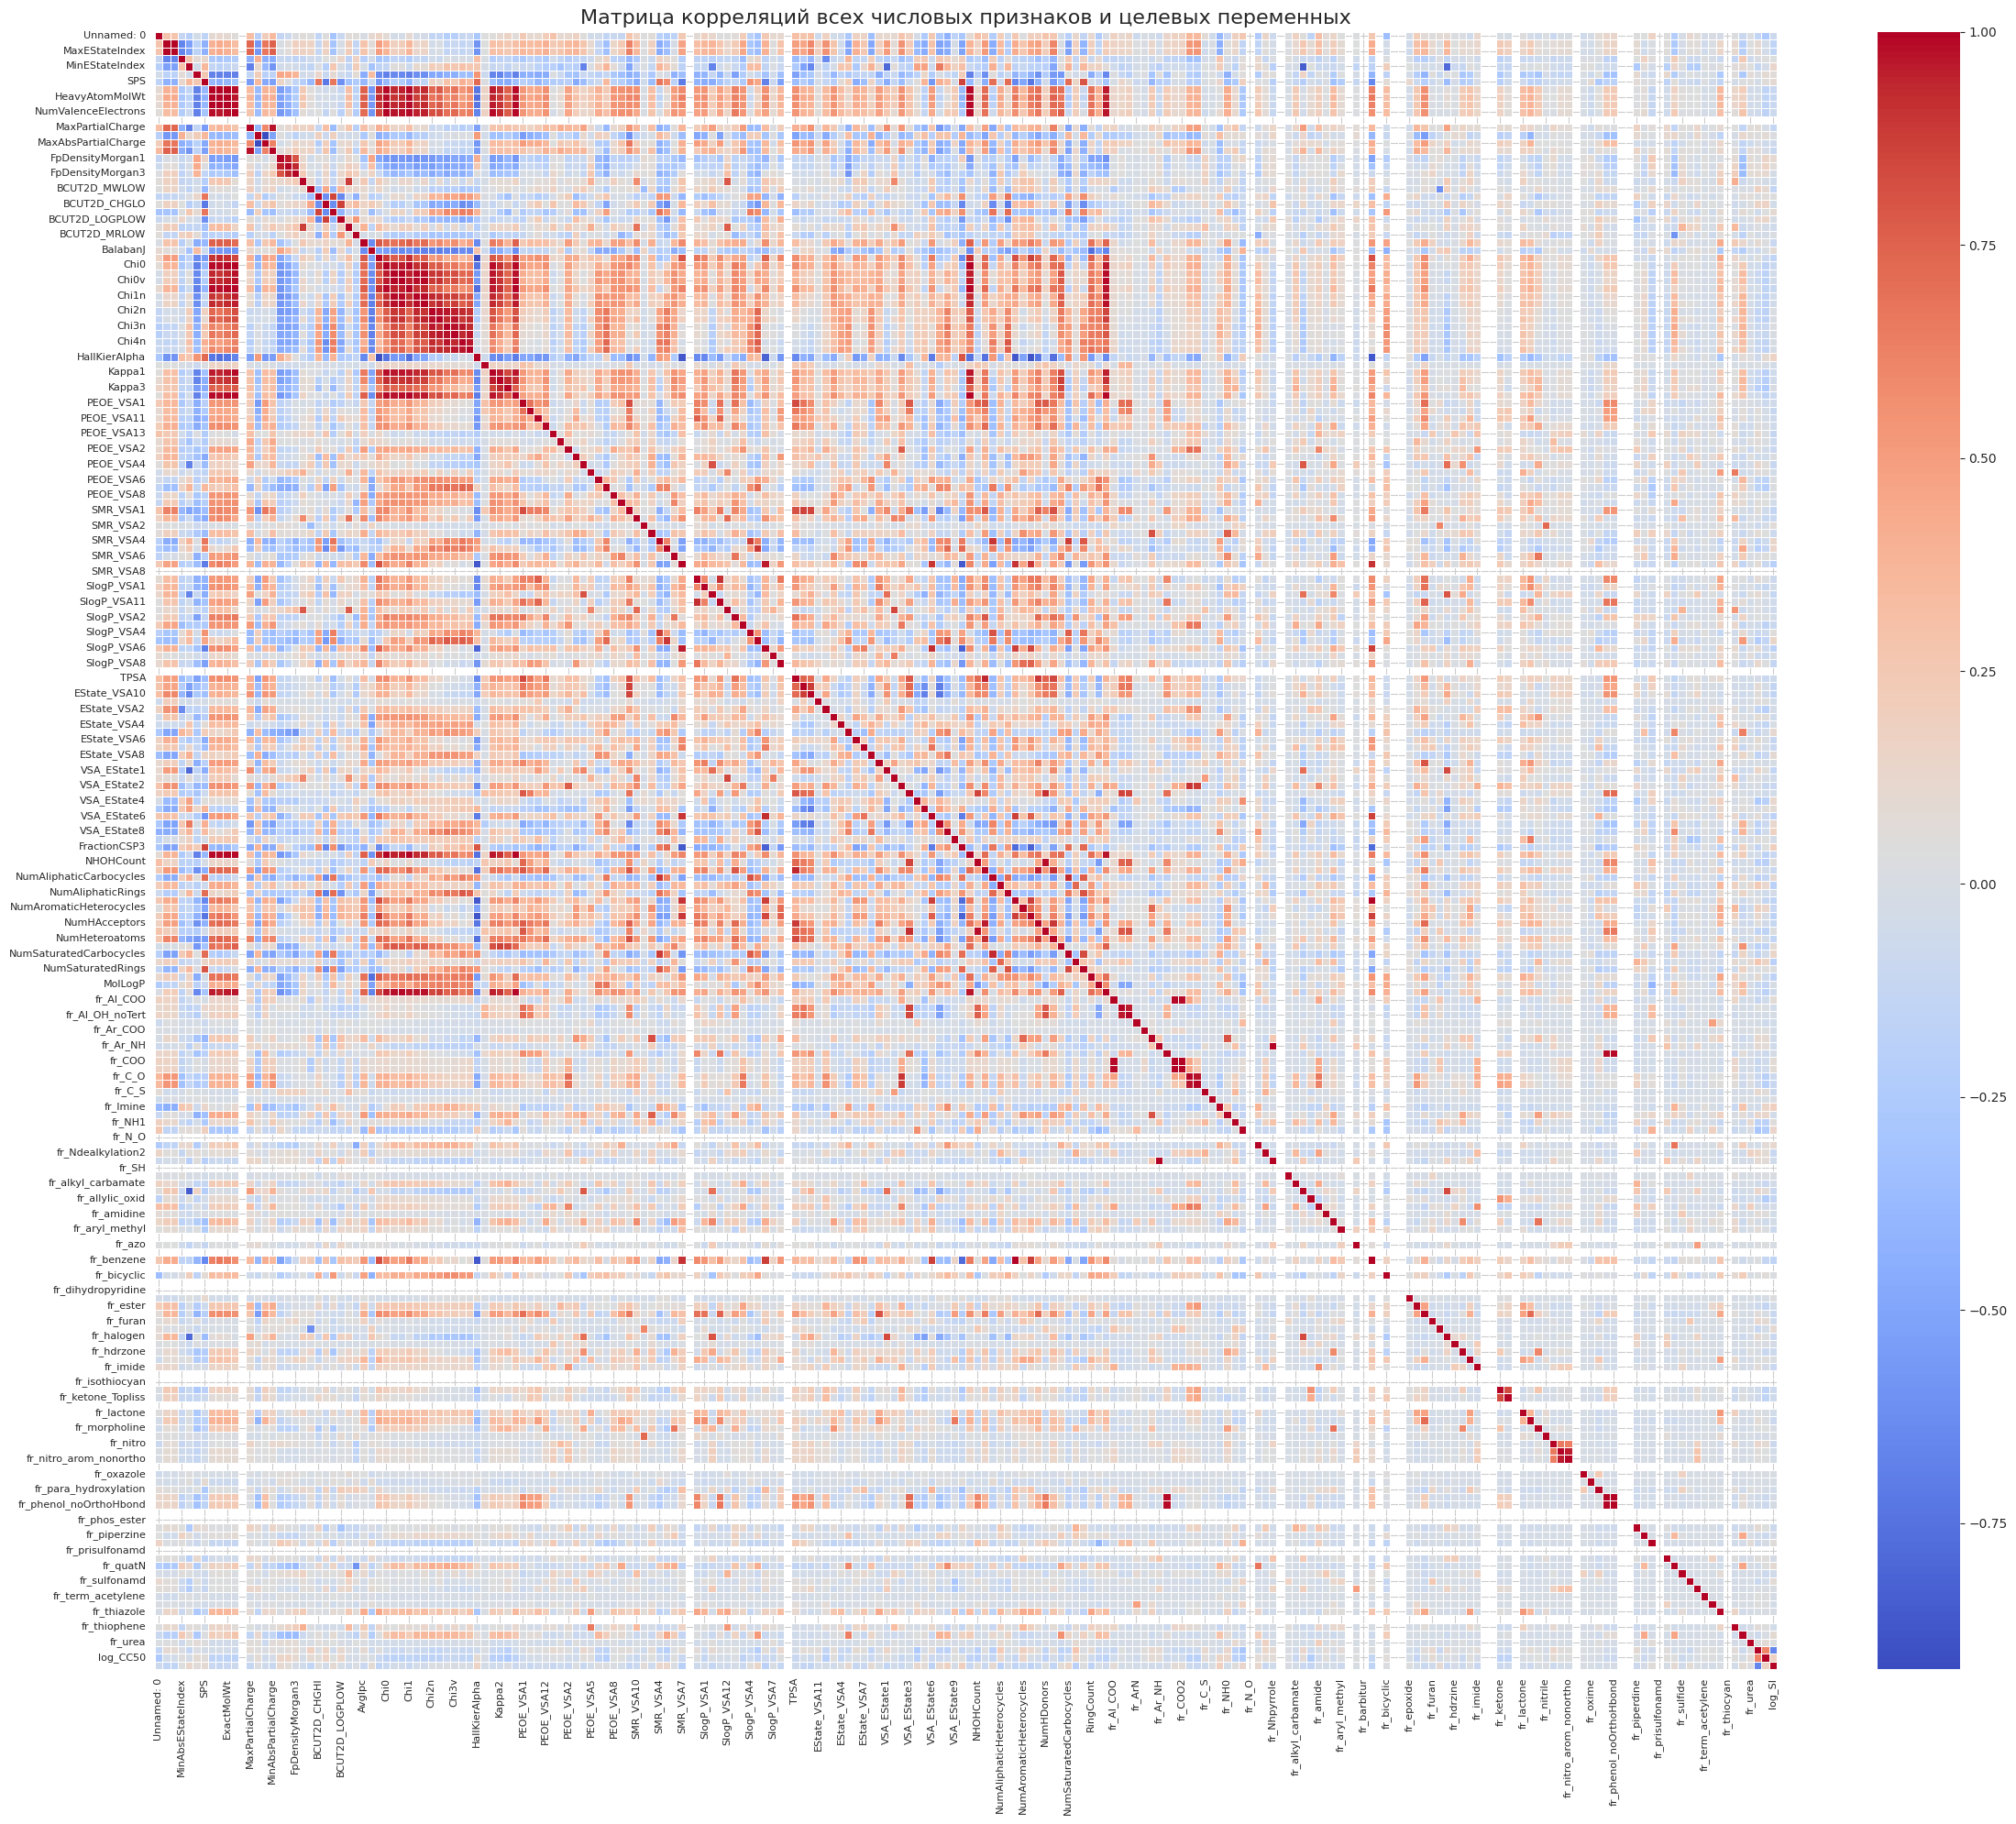


Корреляция признаков с целевыми переменными (Топ-10 положительных и отрицательных):

--- Корреляция с log_IC50 ---
Топ-10 положительных корреляций:
log_CC50                    0.615896
NumSaturatedHeterocycles    0.270582
NumAliphaticHeterocycles    0.234854
BCUT2D_MWLOW                0.184845
NumAromaticHeterocycles     0.182305
BCUT2D_CHGLO                0.156763
VSA_EState1                 0.145519
fr_Ndealkylation2           0.139067
fr_alkyl_halide             0.135908
fr_nitro                    0.132147
Name: log_IC50, dtype: float64

Топ-10 отрицательных корреляций:
log_SI                    -0.663433
fr_NH2                    -0.284985
VSA_EState4               -0.245987
SlogP_VSA5                -0.217679
SMR_VSA5                  -0.206593
Kappa3                    -0.192409
NHOHCount                 -0.188710
NumAliphaticCarbocycles   -0.185933
fr_NH1                    -0.181194
VSA_EState8               -0.179779
Name: log_IC50, dtype: float64

--- Корреляция с log_CC5

In [ ]:
print("Анализ признаков химических соединений (Корреляционный анализ)")

# Исключаем исходные целевые переменные из списка признаков для корреляционного анализа
# Используем логарифмированные версии целевых переменных, если они были созданы
features_for_corr = [col for col in df.columns if col not in target_cols and not col.startswith('log_') and df[col].dtype in ['float64', 'int64']]
targets_for_corr = transformed_target_cols if transformed_target_cols else target_cols # Используем логарифмированные, если есть

# Рассчитываем матрицу корреляций
# Включаем все числовые признаки и логарифмированные целевые переменные (если есть)
correlation_matrix = df[features_for_corr + targets_for_corr].corr()

plt.figure(figsize=(24, 20)) # Увеличиваем размер для лучшей читаемости
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляций всех числовых признаков и целевых переменных', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

# Корреляция признаков с целевыми переменными (отсортировано)
print("Корреляция признаков с целевыми переменными (Топ-10 положительных и отрицательных):")
for target in targets_for_corr:
    print(f"Корреляция с {target}")
    # Убедимся, что целевая переменная не включается в свой список корреляции
    corr_with_target = correlation_matrix[target].drop(target, errors='ignore')
    print("Топ-10 положительных корреляций:")
    print(corr_with_target.sort_values(ascending=False).head(10))
    print("\nТоп-10 отрицательных корреляций:")
    print(corr_with_target.sort_values(ascending=True).head(10))

# Выявление сильно коррелирующих признаков между собой (для возможного удаления избыточных)
# Это помогает бороться с мультиколлинеарностью
highly_correlated_features_to_drop = set()
threshold = 0.9 # Порог для определения "сильной" корреляции

print(f"Выявление сильно коррелирующих признаков между собой (порог > {threshold})")
# Создаем отдельную матрицу корреляций только для признаков (без целевых переменных)
feature_correlation_matrix = df[features_for_corr].corr().abs() # Используем абсолютное значение корреляции

# Перебираем верхний треугольник матрицы корреляций
for i in range(len(features_for_corr)):
    for j in range(i + 1, len(features_for_corr)):
        feature1 = features_for_corr[i]
        feature2 = features_for_corr[j]
        if feature_correlation_matrix.loc[feature1, feature2] > threshold:
            # Можно решить, какой из двух удалить. Проще всего добавить один из них в список.
            # Здесь мы просто добавляем feature2, предполагая, что feature1 будет сохранен.
            highly_correlated_features_to_drop.add(feature2)
            print(f"Сильная корреляция: '{feature1}' и '{feature2}' с r = {feature_correlation_matrix.loc[feature1, feature2]:.2f}")

if highly_correlated_features_to_drop:
    print(f"Обнаружены следующие высоко коррелирующие признаки (рассмотрите их удаление, чтобы избежать мультиколлинеарности):")
    for feat in highly_correlated_features_to_drop:
        print(f"- {feat}")
    # Пример удаления:
    # df.drop(columns=list(highly_correlated_features_to_drop), inplace=True)
    # print(f"Удалены высоко коррелирующие признаки. Новый размер данных: {df.shape}")
else:
    print("Высоко коррелирующих признаков (с порогом > 0.9) не найдено среди дескрипторов.")

удаление высоко коррелирующих признаков

In [ ]:
highly_correlated_features_to_drop = set()
threshold = 0.9
feature_correlation_matrix = df[features_for_corr].corr().abs()

for i in range(len(features_for_corr)):
    for j in range(i + 1, len(features_for_corr)):
        feature1 = features_for_corr[i]
        feature2 = features_for_corr[j]
        if feature_correlation_matrix.loc[feature1, feature2] > threshold:
            highly_correlated_features_to_drop.add(feature2) # Добавляем feature2

In [ ]:
# Убедитесь, что highly_correlated_features_to_drop был заполнен из вашего анализа
print(f"\nКоличество признаков до удаления высоко коррелирующих: {df.shape[1]}")
if highly_correlated_features_to_drop:
    df.drop(columns=list(highly_correlated_features_to_drop), inplace=True)
    print(f"Удалены следующие высоко коррелирующие признаки: {list(highly_correlated_features_to_drop)}")
    print(f"Количество признаков после удаления: {df.shape[1]}")
else:
    print("Нет признаков для удаления по критерию высокой корреляции.")


Количество признаков до удаления высоко коррелирующих: 217
Удалены следующие высоко коррелирующие признаки: ['Kappa3', 'fr_Al_OH_noTert', 'fr_benzene', 'NumSaturatedCarbocycles', 'fr_C_O_noCOO', 'Chi4v', 'NOCount', 'ExactMolWt', 'FpDensityMorgan2', 'fr_nitro_arom_nonortho', 'SlogP_VSA11', 'fr_phenol', 'HallKierAlpha', 'Chi4n', 'FpDensityMorgan3', 'LabuteASA', 'HeavyAtomCount', 'NumAromaticCarbocycles', 'MaxEStateIndex', 'Chi1', 'HeavyAtomMolWt', 'BertzCT', 'fr_C_O', 'Chi3v', 'Chi2v', 'Chi0v', 'Kappa2', 'NumHAcceptors', 'NumHDonors', 'Chi1n', 'Kappa1', 'MaxAbsPartialCharge', 'SlogP_VSA6', 'Chi0', 'Chi1v', 'Chi0n', 'fr_phenol_noOrthoHbond', 'MinAbsPartialCharge', 'NumHeteroatoms', 'Chi2n', 'fr_Nhpyrrole', 'NumValenceElectrons', 'VSA_EState6', 'Chi3n', 'MolMR', 'fr_COO2', 'fr_COO']
Количество признаков после удаления: 170


# 5. Предварительный отбор признаков и выводы

Также удаляем IC50, CC50, CC50, так как будет прогнозировать logи.

In [ ]:
df.columns.tolist()

['IC50, mM',
 'CC50, mM',
 'SI',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'FpDensityMorgan1',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'Ipc',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA8',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA7',
 'SlogP_VSA8',
 'SlogP_VSA9',
 'TPSA',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA11',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',

Сохраним полученный новый датасет

In [ ]:
output_excel_file = 'processed_compounds_data.xlsx'
df.to_excel(output_excel_file, index=False)
print(f"Обработанный датафрейм успешно сохранен в файл: '{output_excel_file}'")


Обработанный датафрейм успешно сохранен в файл: 'processed_compounds_data.xlsx'
